## 4. Styles

Up to this point in the user guide, we have relied on the automatic styles provided by the `quickplot` function. While these defaults offer a convenient starting point, there are many cases where you may want full control over the appearance of your visualisations.

This section explores how to customise your plots, allowing you to tailor styles to suit your data, preferences, and presentation needs.

### The `Style` Class

In **earthkit-plots**, the `Style` class provides a powerful way to separate styling concerns from data when creating visualisations. Instead of specifying style parameters directly within each plotting function call, you can define a reusable `Style` object and pass it to a plotting function using `style=style`. This improves code readability, encourages consistency across plots, and makes it easier to switch between different visual styles.

The `Style` class is designed to integrate seamlessly with Matplotlib. It accepts most keyword arguments that Matplotlib's standard plotting functions (such as `contour`, `contourf`, and `pcolormesh`) support. This means you can control aspects like colours, line styles, and transparency just as you would in native Matplotlib, while also benefiting from additional functionality provided by **earthkit-plots**, like:

- **Unit Conversions**  
  Automatically convert data between different units on the fly, ensuring consistency across plots without manually transforming the input data.
  
- **Advanced Level Definitions**  
  Define contour levels in a more flexible way, including step-based levels with reference points, making it easier to highlight key data ranges.
  
- **Customisable Legends**  
  Easily adapt legends to suit different data types and visualisation needs, ensuring clear and effective communication of plotted information.

### Plotting temperature

Let's start by plotting some simple ERA5 temperature data over the North Atlantic. First, let's get the data.

In [1]:
import earthkit as ek

data = ek.data.from_source("sample", "era5-monthly-mean-2t-199312.grib")

Let's say we want to plot this data in units of **Celsius**, with **levels** from -30 to 30 in steps of 3, using Matplotlib's `Spectral` colormap (see [Colormaps in Matplotlib](https://matplotlib.org/stable/gallery/color/colormap_reference.html). We also want to **extend** the legend in **both** the maximum a minimum directions to cover data which falls outside the range.

We can define a `Style` with all of these features:

In [2]:
style = ek.plots.styles.Style(

    # Levels from -30 to 30 in steps of 3
    levels=range(-30, 31, 3),

    # Use the Spectral colormap from matplotlib (reversed with _r)
    colors="Spectral_r",

    # Use units of Celsius
    units="celsius",

    # Extend the colorbar at both ends
    extend="both",
    
)

We can now pass this to any plotting function with `style=style` - for example with `quickplot`:

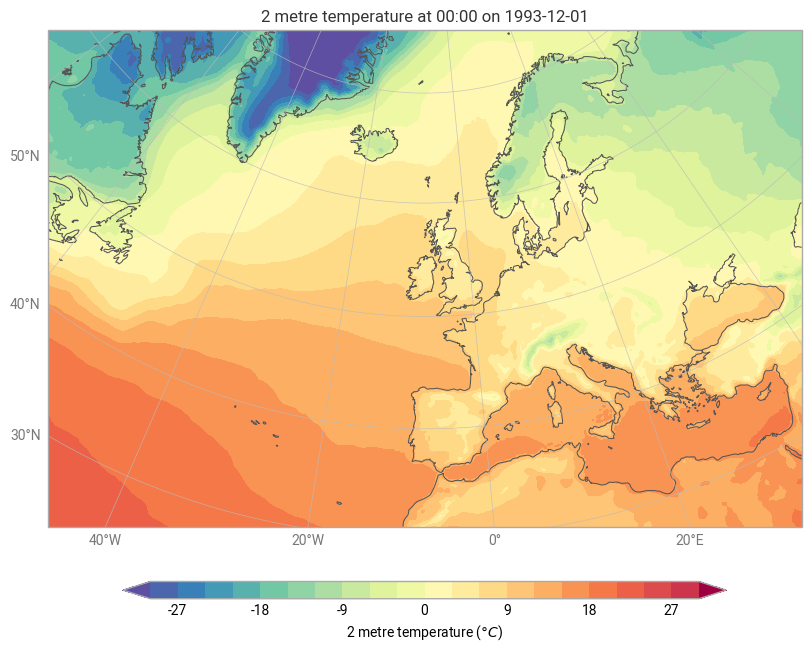

In [3]:
ek.plots.quickplot(data, domain="North Atlantic", style=style).show()

Or with `grid_cells`:

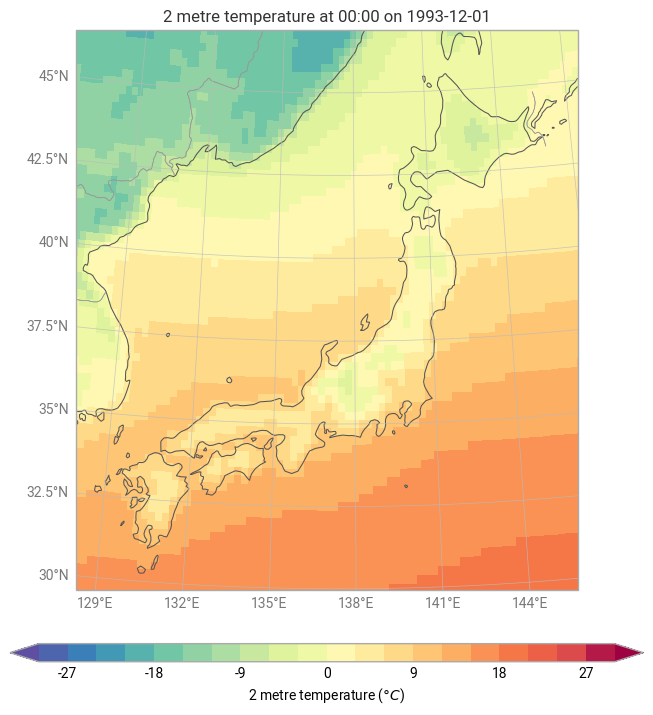

In [4]:
chart = ek.plots.Map(domain="Japan")

chart.grid_cells(data, style=style)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title()
chart.legend()

chart.show()

### Contour Styles

In **earthkit-plots**, there are specialised style objects designed for specific plot types. One such example is the `Contour` style, available via `earthkit.plots.styles.Contour`. This allows for fine-grained control over the appearance of contour plots, making it easy to customise their presentation.

#### Plotting Mean Sea Level Pressure with a Custom Contour Style

Let’s create a contour plot of mean sea level pressure using a tailored contour style.

#### 1. Load the Data  

First, let's retrieve the sample data:

In [5]:
_, pressure = ek.data.from_source("sample", "era5-2t-msl-1985122512.grib")

#### 2. Define the Contour Style  

We will customise our contour plot with the following styling choices:

- **Contour levels in hPa** to display pressure in hectopascals.  
- **Black contours** for a clean and consistent appearance.  
- **A thicker contour line every four lines** to improve readability.  
- **No legend**, as contour plots often don’t require one.  
- **Contour levels in steps of four**, ensuring a structured and intuitive display.  

This is how we define our custom `Contour` style:

In [6]:
style = ek.plots.styles.Contour(

    # One contour every 4 hPa - by default, this will be all multiples of step (4),
    # but you can change this with the `reference` key
    # NOTE: you can also pass a list or range
    levels={"step": 4},

    # Make every contour line black
    linecolors="black",

    # Convert to units of hPa
    units="hPa",

    # Highlight every fourth line
    linewidths=[0.25, 0.25, 0.25, 0.75],

    # Apply contour labels
    labels=True,

    # Do not use a legend (useful with quickplot, which will try to add legends by default)
    legend_style=None,

)

Again, we can pass this into a plotting method with the `style` keyword argument:

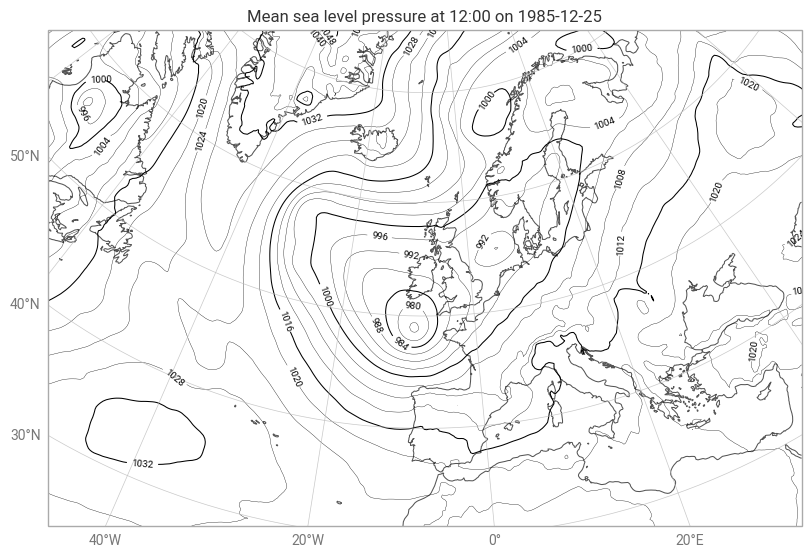

In [7]:
ek.plots.quickplot(pressure, domain="North Atlantic", style=style).show()

Users can also navigate the list of available style for the data

In [8]:
data = ek.data.from_source("sample", "era5-2t-msl-1985122512.grib")
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,surface,0,19851225,1200,0,an,0,regular_ll
1,ecmf,msl,surface,0,19851225,1200,0,an,0,regular_ll


In [ ]:

available_styles = ek.plots.styles.get_available_styles(data)
print(available_styles)

AttributeError: 'int' object has no attribute 'startswith'

### What's next?

Next we will explore more about the custom domains that you can use for your **earthkit-plots** maps.